# Lending Club Case Study

## 1. Data Analysis Overview

### 1.1. Problem Statement
Lending Club, a consumer finance marketplace that provides various loan products, encounters a significant challenge in optimizing its loan approval process. The primary issue lies in making well-informed decisions to reduce financial losses, mainly caused by loans granted to "risky" applicants.

These financial risks, known as credit losses, arise when borrowers are unable to repay their loans and ultimately default. In other words, the "charged-off" borrowers contribute to the most substantial financial losses for the company.

The main goal of this case study is to aid Lending Club in minimizing credit losses, which involves two key scenarios:
- Identifying reliable applicants likely to repay their loans, as they provide profits through interest payments. Rejecting such applicants would lead to lost revenue opportunities.
- Avoiding approval for applicants likely to default, as this could result in considerable financial losses for the company.

### 1.2. Objectives
The goal of this study is to identify applicants at high risk of default, ultimately helping to decrease credit losses through Exploratory Data Analysis (EDA) on the provided dataset.

In particular, the company aims to understand the key factors (or driver variables) contributing to loan default, which will support its portfolio and risk assessment.

### 1.3. Dataset Overview
The dataset contains information on previous loan applicants and their "Charged Off" status. It aims to identify patterns that signal potential default, assisting in decision-making processes such as denying loans, lowering loan amounts, or offering higher interest rates to risky applicants.

Please note that the dataset only includes approved loans and lacks information on rejection criteria. The primary objective is to identify driver variables related to default within the dataset, laying the groundwork for hypothesis development. The loan process includes three main stages:
1. Borrower requests a specific loan amount (`loan_amnt`).
2. Approver assigns an amount based on past data and risk evaluation (`funded_amnt`).
3. Investor sets the final loan offer amount (`funded_amnt_inv`).

### 1.4. Key Dataset Attributes
- **Principal Attribute**: Loan Status (`loan_status`), which has three values:
  - **Fully-Paid**: Loans successfully repaid.
  - **Charged-Off**: Loans that have defaulted.
  - **Current**: Ongoing loans that don’t indicate future outcomes.
  - For this analysis, loans with a "Current" status are excluded.

- **Decision Matrix**:
  - **Fully Paid**: Loans fully repaid, covering both principal and interest.
  - **Current**: Active loans still within the repayment period and not yet defaulted.
  - **Charged-Off**: Loans where payments have stopped for an extended period, resulting in default.
  - **Loan Rejection**: Rejected loans have no transaction history and are excluded from this dataset.

### 1.5. Key Columns of Interest
These attributes, available during the application process, contribute significantly to the likelihood of loan approval or rejection. Columns with extensive missing data may be excluded.

- **Customer Demographics**:
  - **Annual Income (`annual_inc`)**: Higher income increases loan approval likelihood.
  - **Home Ownership (`home_ownership`)**: Homeownership offers collateral, enhancing approval chances.
  - **Employment Length (`emp_length`)**: Longer tenure indicates stability, improving approval odds.
  - **Debt to Income (`dti`)eal demographic trends affecting default rates.

- **Loan Characteristics**:
  - **Loan Amount (`loan_amt`)**: Amount requested by the borrower.
  - **Grade (`grade`)**: Creditworthiness rating indicating risk.
  - **Term (`term`)**: Loan duration in months.
  - **Loan Date (`issue_d`)**: Approval date.
  - **Purpose of Loan (`purpose`)**: Loan reason, such as debt consolidation or home improvement.
  - **Verification Status (`verification_status`)**: Indicates if income has been verified.
  - **Interest Rate (`int_rate`)**: Annual interest rate.
  - **Installment (`installment`)**: Monthly repayment amount, covering principal and interest.
  - **Public Records (`public_rec`)**: Derogatory records reduce approval chances.
  - **Bankruptcy Records (`public_rec_bankruptcy`)**: Higher bankruptcy records correlate with reduced approval likelihood.

### Excluded Columns
For this analysis, some columns are omitted:
- **Customer Behavior Columns**: Variables reflecting post-approval customer behavior are excluded as they do not impact the initial loan application.
- **Granular Data**: Excessively detailed data (e.g., "sub grade") is excluded, while broader categories (e.g., "grade") remain for relevant visualizations and insights.


In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
sns.set_palette("deep")

In [364]:
loan_data = pd.read_csv("loan.csv")

In [365]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [368]:
loan_data.shape

(39717, 111)

In [370]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [77]:
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Dropping Empty Columns 

In [83]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

In [85]:
loan_data.shape

(39717, 57)

## Find out single valued columns

In [87]:
single_valued_columns = [col for col in loan_data.columns if loan_data[col].nunique() == 1]
print(single_valued_columns)

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


## Dropping single valued columns

In [89]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [91]:
loan_data.shape

(39717, 48)

### After going through Data Dictionary dropping not required columns

In [93]:
loan_data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [95]:
loan_data.shape

(39717, 21)

### Below is The list of Columns we will use in out analysis further

In [97]:
for i, col in enumerate(loan_data.columns, start=1):
    print(f"{i}. {col}")

1. loan_amnt
2. funded_amnt_inv
3. term
4. int_rate
5. installment
6. grade
7. sub_grade
8. emp_length
9. home_ownership
10. annual_inc
11. verification_status
12. issue_d
13. loan_status
14. purpose
15. dti
16. earliest_cr_line
17. inq_last_6mths
18. open_acc
19. pub_rec
20. revol_util
21. total_acc


### Checking for Type of Loan Statuses Available in Column

In [99]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

## Removing Loans/rows with Status as "Current" as they are not useful for analysis

In [101]:
loan_data = loan_data[loan_data.loan_status != "Current"]

In [103]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

## Need to check for missing values in Remaining Rows

In [105]:
loan_data.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

### 'emp_length' having missing values will replace it with Mode values

In [107]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)

In [109]:
loan_data.emp_length.isna().sum()

0

## Dropping empty rows for revol_util as count is less compared to 39717 row count

In [111]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)

In [113]:
loan_data.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

# Data is clean Now !

In [115]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [117]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null  obje

## 'revol util', 'int rate' , 'emp length'  Need to coonvert into Numeric Value for Analysis

In [127]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [141]:
loan_data.revol_util.info()

<class 'pandas.core.series.Series'>
Index: 38527 entries, 0 to 39716
Series name: revol_util
Non-Null Count  Dtype  
--------------  -----  
38527 non-null  float64
dtypes: float64(1)
memory usage: 602.0 KB


In [129]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [139]:
loan_data.int_rate.info()

<class 'pandas.core.series.Series'>
Index: 38527 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
38527 non-null  float64
dtypes: float64(1)
memory usage: 602.0 KB


In [131]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [137]:
loan_data.emp_length.info()

<class 'pandas.core.series.Series'>
Index: 38527 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype
--------------  -----
38527 non-null  int64
dtypes: int64(1)
memory usage: 602.0 KB


## We have 'annual_inc' column lets check for outlier if any and Clean Data

<Axes: ylabel='annual_inc'>

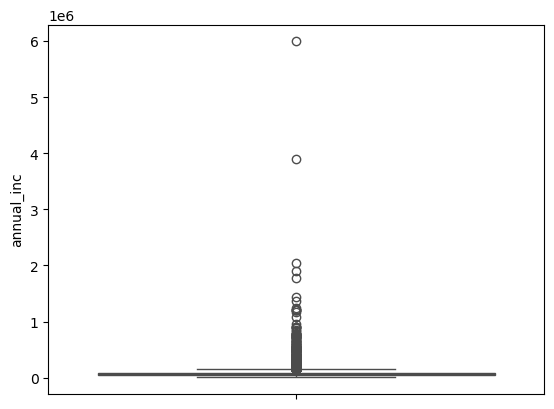

In [147]:
sns.boxplot(loan_data['annual_inc'])

In [149]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [153]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

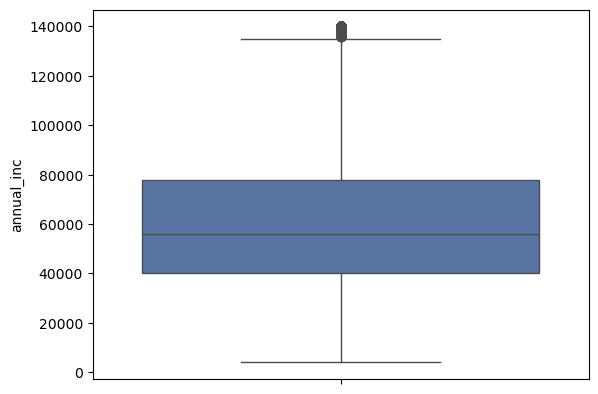

In [157]:
sns.boxplot(loan_data['annual_inc'])

## We have 'loan_amnt' column lets check for outlier if any and Clean Data

<Axes: ylabel='loan_amnt'>

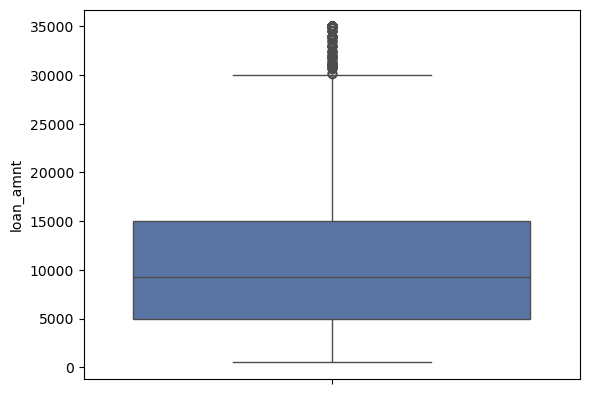

In [163]:
sns.boxplot(loan_data.loan_amnt)

In [165]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

# We have cleaned data now, Let's Start Visualize and Get Insights from Data

## Uni-Variate Analysis

<Axes: xlabel='loan_status', ylabel='count'>

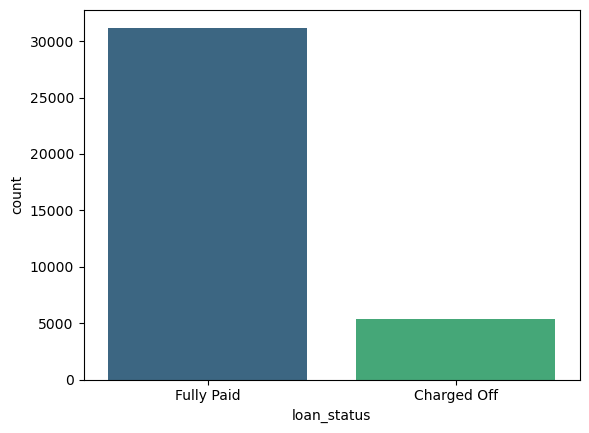

In [172]:
sns.countplot(x='loan_status', data=loan_data,palette="viridis")

In [267]:
total_loans = len(loan_data)

In [269]:
charged_off_count = len(loan_data[loan_data['loan_status'] == 'Charged Off'])

In [271]:
charged_off_percent = (charged_off_count / total_loans) * 100
print(f"Percentage of Charged Off loans: {charged_off_percent:.2f}%")

Percentage of Charged Off loans: 14.76%


## 'Lets Analyze Home Ownership for Charged Off Loans'

<Axes: xlabel='home_ownership', ylabel='count'>

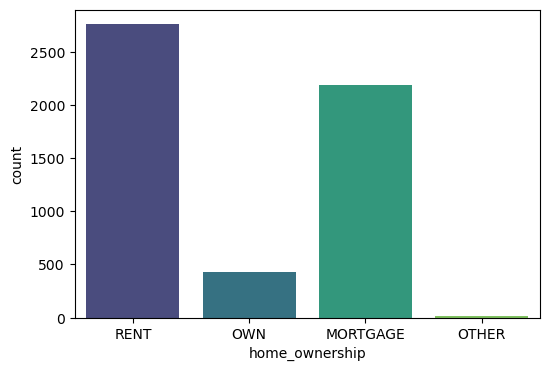

In [181]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'linear')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

### __"Out of Charged Off loans Most of Applicants have Either Home Owneship Status as RENT or MORGAGE"__

## 'Lets Analyze Purpose for Charged Off Loans'

<Axes: xlabel='count', ylabel='purpose'>

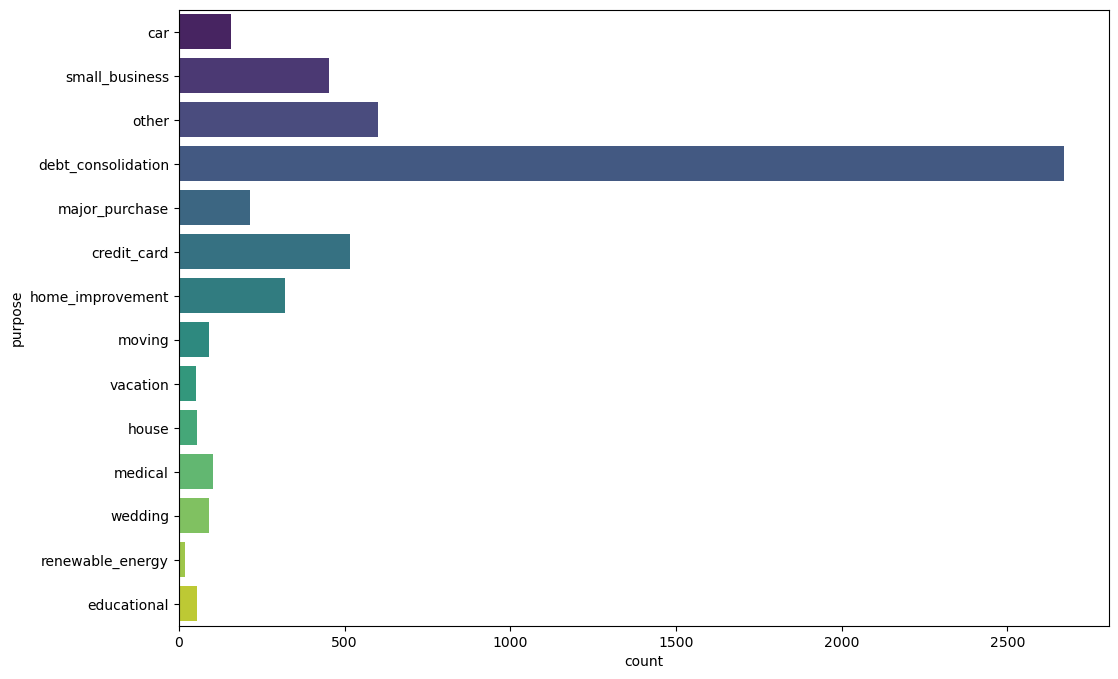

In [191]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'linear')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'],palette="viridis")

### __"The purpose 'debt_consolidation' have higher chances of default "__

## 'Lets Analyze 'term' for Charged Off Loans'

<Axes: xlabel='count', ylabel='term'>

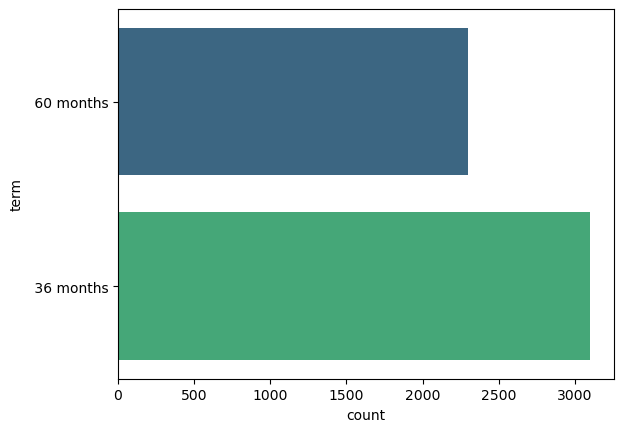

In [207]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

## 'Lets Analyze 'verification_status' for Charged Off Loans'

<Axes: xlabel='verification_status', ylabel='count'>

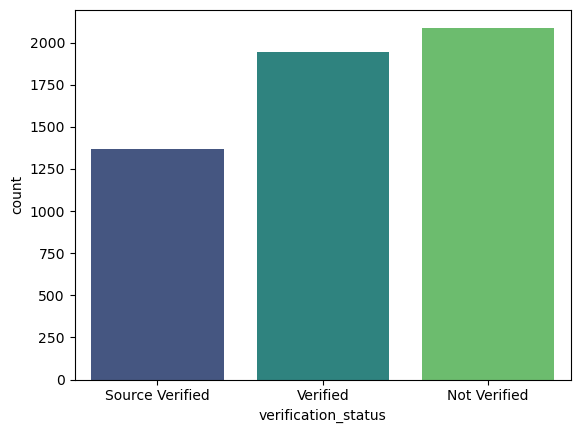

In [214]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

## 'Lets Analyze 'inq_last_6mths' for Charged Off Loans'

<Axes: xlabel='inq_last_6mths', ylabel='count'>

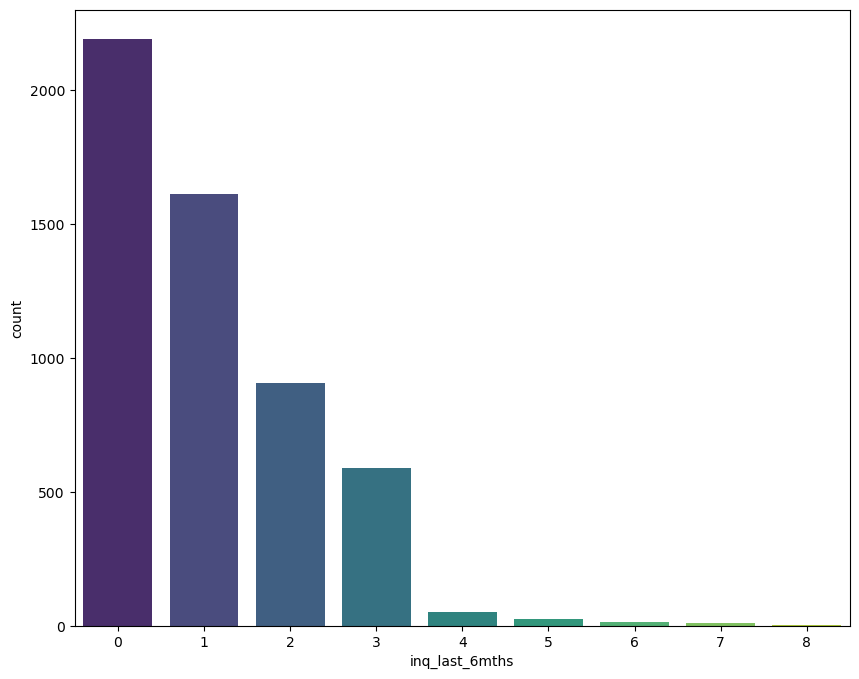

In [222]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('linear')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

## 'Lets Analyze by issued month and year'

In [228]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

<Axes: xlabel='issue_year', ylabel='count'>

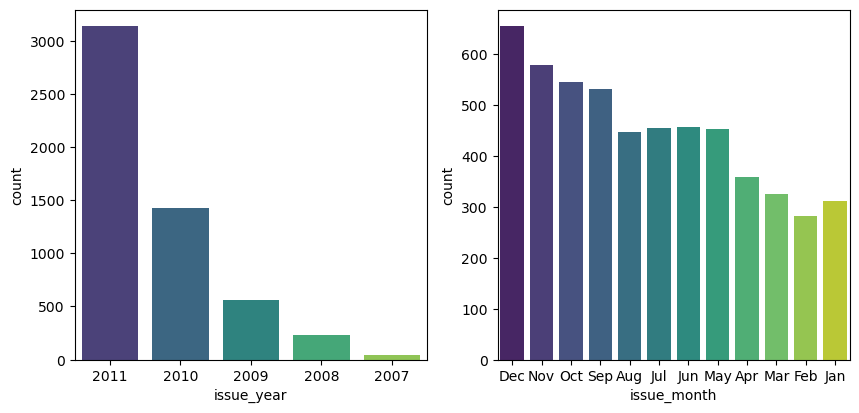

In [236]:
plt.figure(figsize=(10,10))
plt.subplot(222)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")
plt.subplot(221)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

### __"Maximum number of Defaults occured for loan given in 2011 and in Dec Month"__

## 'Lets Analyze installment, dti, loan_amnt' after dividing them in Beans 

In [308]:
loan_data['installment_grp'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_grp'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_grp'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_grp'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan_data['annual_inc_grp'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<Axes: xlabel='installment_grp', ylabel='count'>

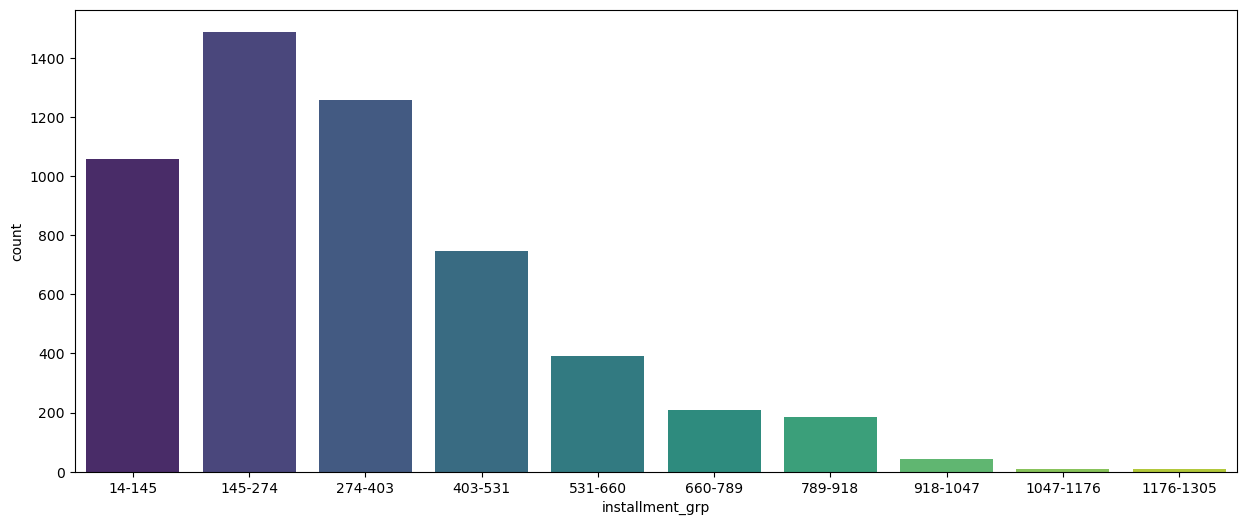

In [250]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('linear')
sns.countplot(x='installment_grp', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

<Axes: xlabel='funded_amnt_inv_grp', ylabel='count'>

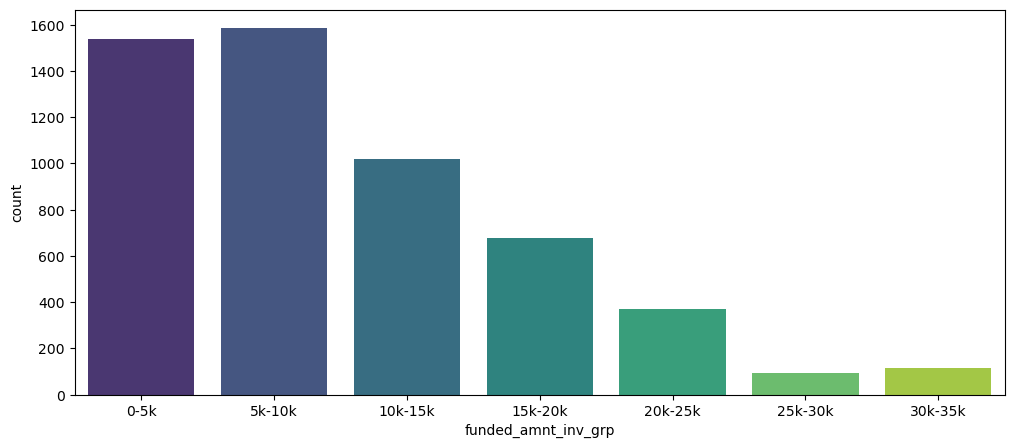

In [256]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('linear')
sns.countplot(x='funded_amnt_inv_grp', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

<Axes: xlabel='loan_amnt_grp', ylabel='count'>

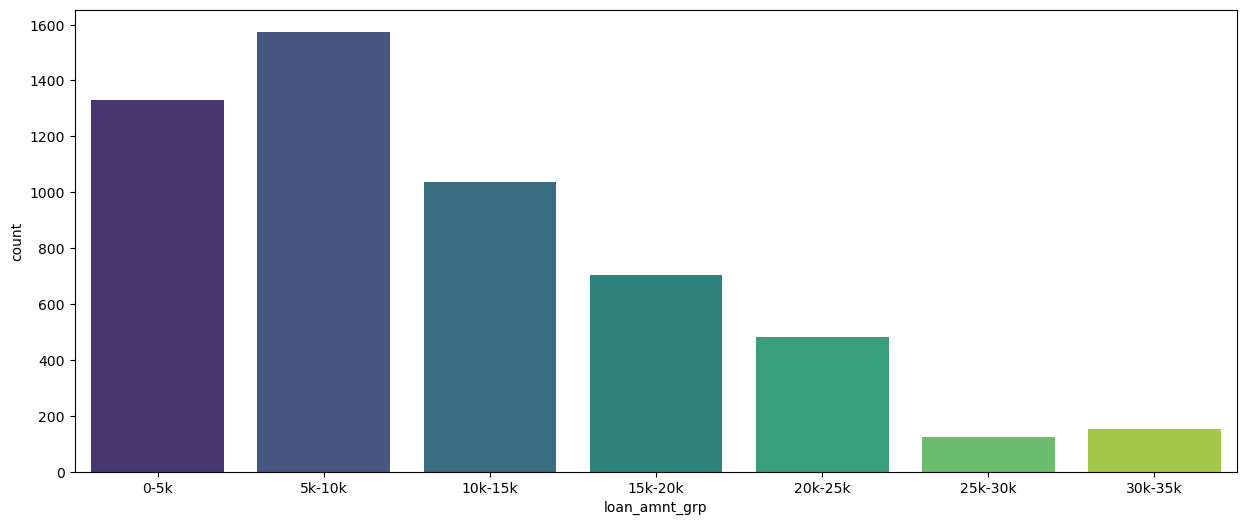

In [260]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('linear')
sns.countplot(x='loan_amnt_grp', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

<Axes: xlabel='dti_grp', ylabel='count'>

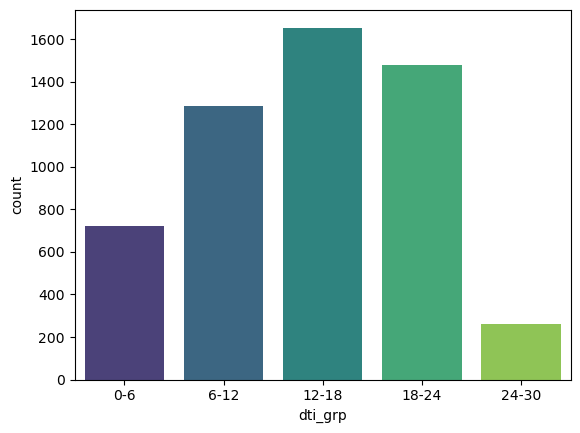

In [264]:
sns.countplot(x='dti_grp', data=loan_data[loan_data['loan_status']=='Charged Off'],palette="viridis")

### Observations:

#### Based on above Analysis on "Changed Off" loans The below Applications category have maximum chance of defaults -
* Rented Applicant 
* Applicants taking loans for Debt-Consolidation
* Verification status as 'Not Verified'
* Term more than 36 Months
* Funded amount by investor is between 5k to 10k
* Loan Amount between 5k to 10k
* Insatallment is between 145-274
* DTI between 12-18

#### Few Other Observations
* Higher number of Default may occur if loan disbursed in December month
* As financial cricis occurs e.g 2011 number of Charged off loan increases

## Bi-Variate Analysis

### As we know Annual Income may affect ability to repay loan Lets Analyze 

## * Annual Income vs Loan Amount

<Axes: xlabel='annual_inc_grp', ylabel='loan_amnt'>

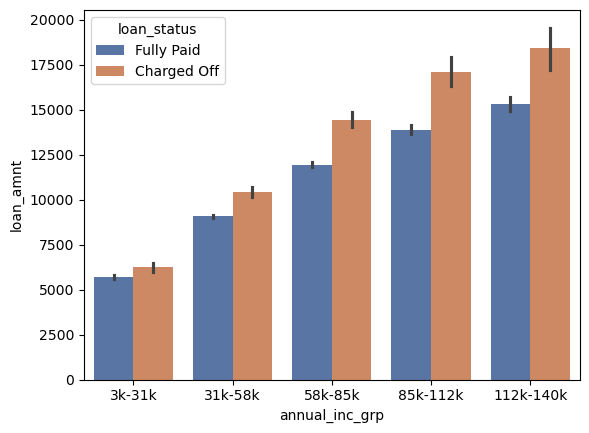

In [310]:
sns.barplot(x = "annual_inc_grp", y = "loan_amnt", hue = 'loan_status', data = loan_data)

## * Annual Income vs Home Ownership

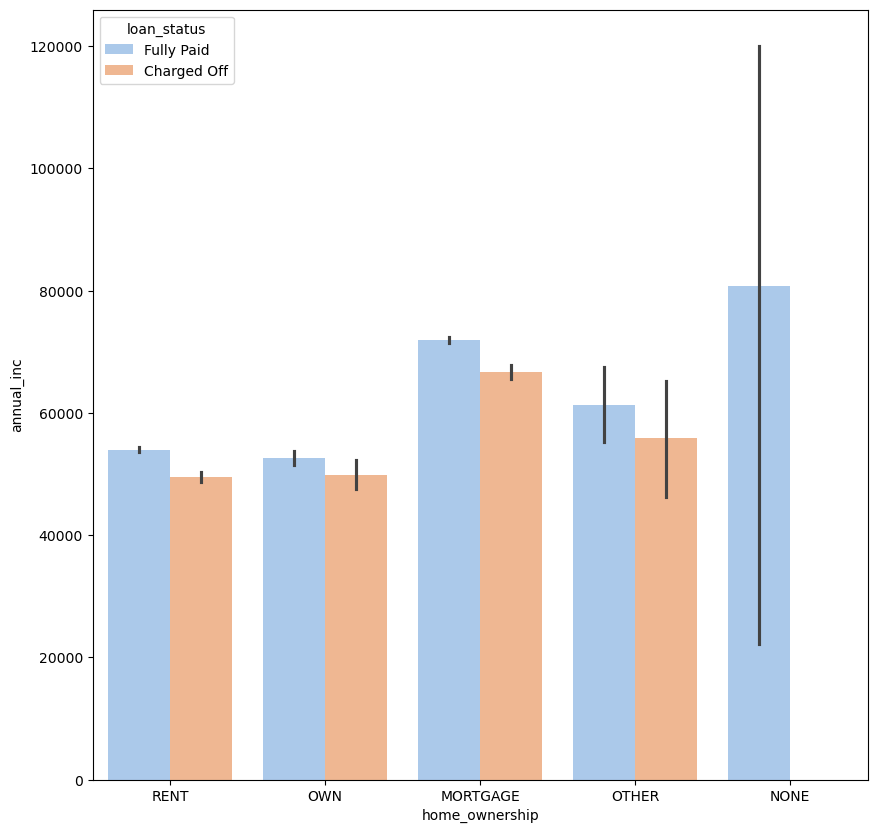

In [314]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## * Annual Income vs Loan Purpose

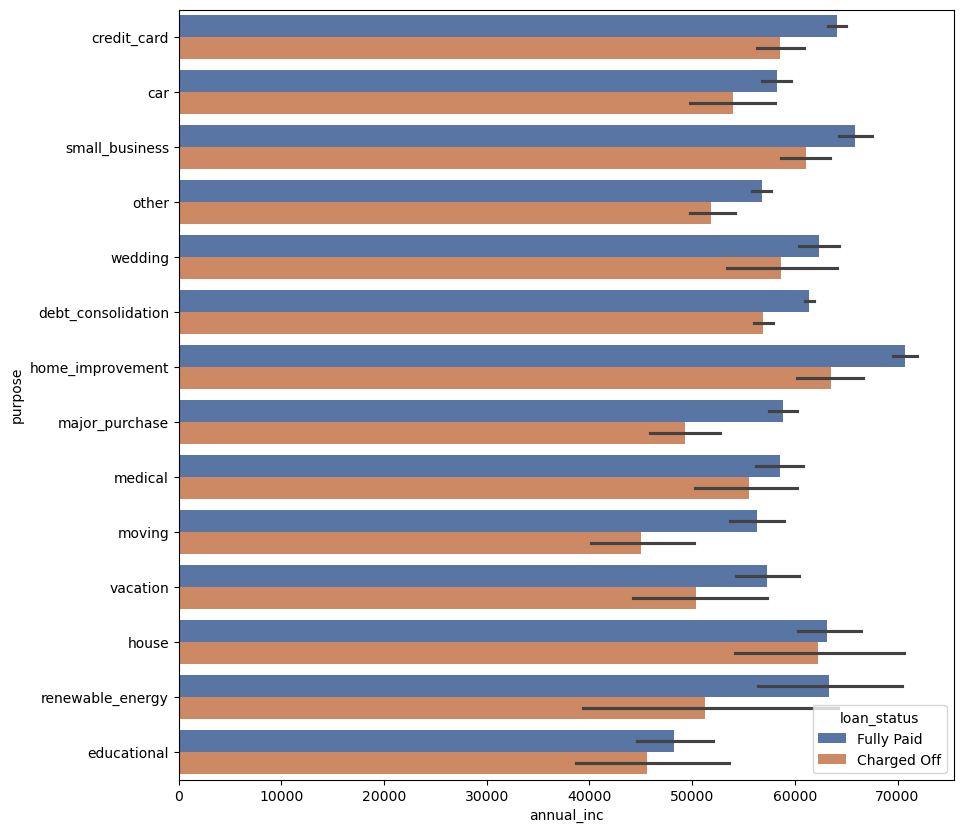

In [320]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

### As we know Intrest Rate may affect ability to repay loan Lets Analyze 

## * Loan Amount vs Intrest Rate

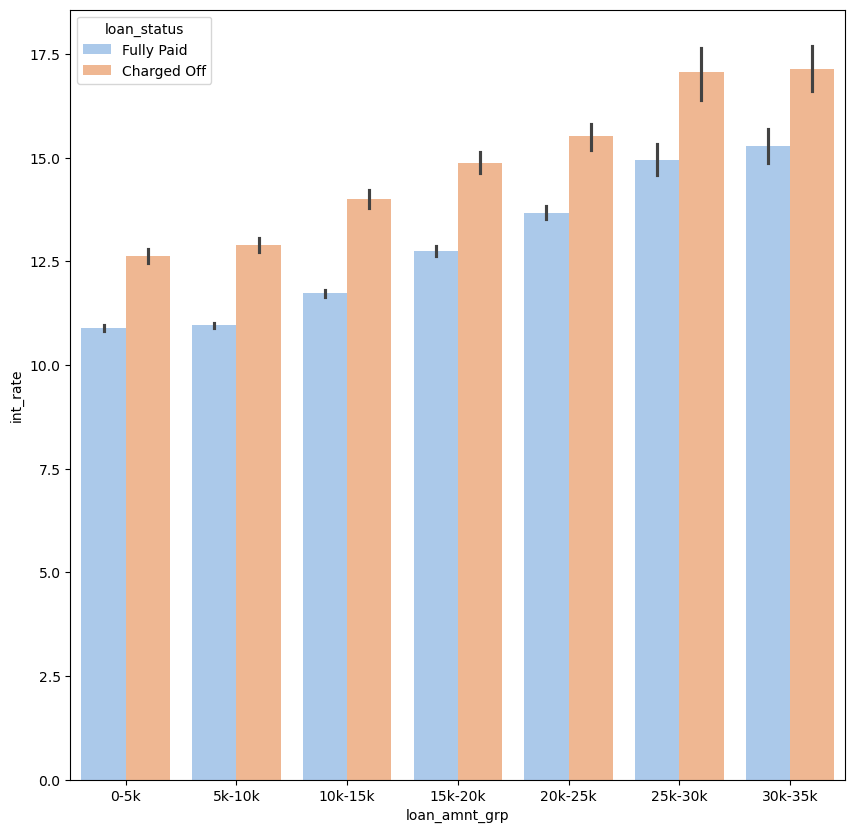

In [330]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt_grp', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

## * Loan vs Loan Purpose

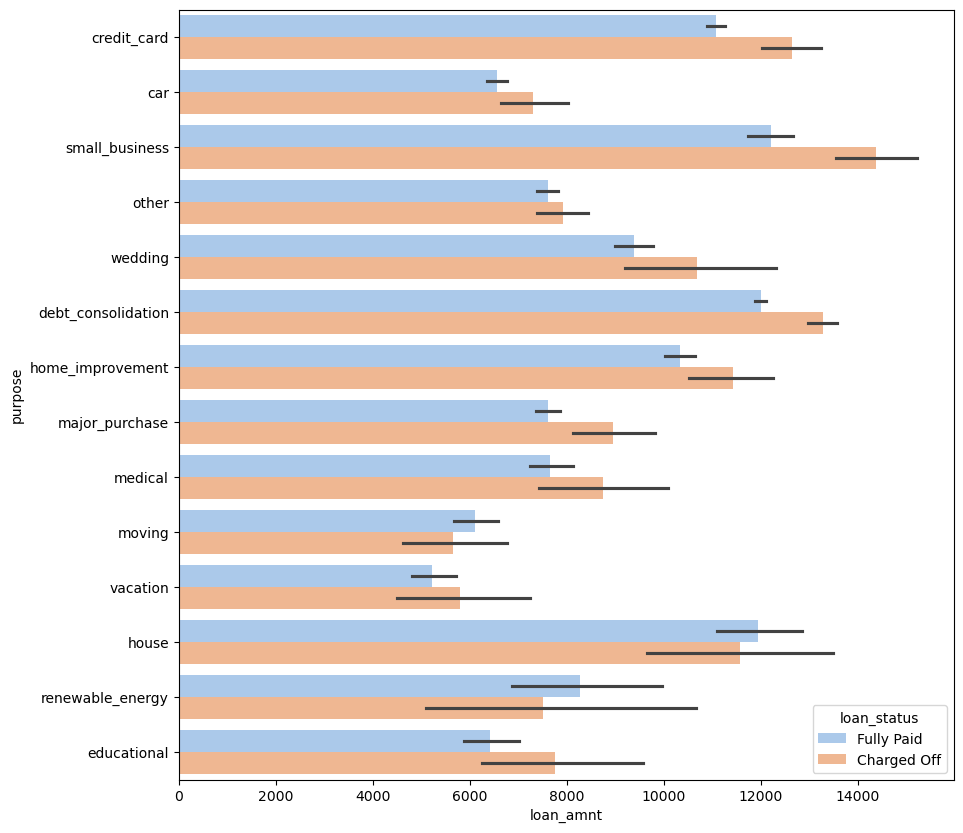

In [336]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

## * Loan vs House Ownership

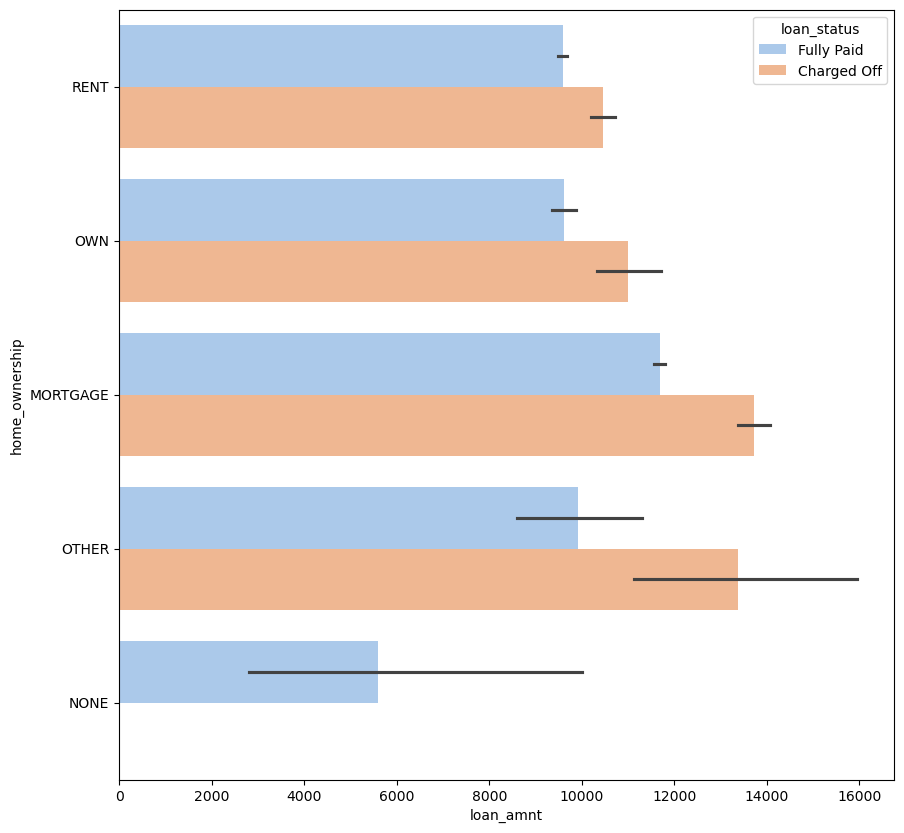

In [341]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

### Observations:

#### Based on above Bi-Variate Analysis on "Changed Off" loans The below Applications category have maximum chance of defaults -
* Applicants taking loan for 'home improvement' and have income of 60k -70k
* Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
* Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5%


### END !